In [11]:
import numpy as np
import pandas as pd
from scipy.special import ndtr
from scipy.stats import norm, ncx2
from scipy.optimize import minimize
from numpy.polynomial.hermite import hermfit, hermval, hermder
import matplotlib.pyplot as plt
from typing import Union, List
import seaborn as sns
np.random.seed(35)


In [12]:
def calculate_zero_coupon_price(time_to_maturity: Union[float, np.ndarray],
                                initial_short_rate: float,
                                kappa: float,
                                theta: float,
                                beta: float):
    
    y_infty = theta * beta / kappa - beta**2 / (2 * kappa**2)
    
    b = 1 / kappa * (1 - np.exp(-kappa * time_to_maturity))
    a = y_infty * (time_to_maturity  - b) + beta**2 / (4 * kappa) * b**2
    
    return np.exp(- a - b * initial_short_rate)


def simulate_vasicek(initial_short_rate: float, kappa: float, theta: float,
                     beta: float, horizon: float, 
                     dt: float=1.0/12, num_sim: int=10000):
    """
    simulates short rate processes in a vasicek setting until a given horizon 
    
    Parameters

    ----------
    
    initial_short_rate:
        initial short rate
    kappa: 
        speed of mean reversion.
    theta: 
        long term mean of the short rate.
    dt:
        increments in time
    horizon:
        time until maturity/expiry (horizon).
    num_sim:
        number of simulations.
    """
    std_rates = np.sqrt(beta**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
    
    num_periods = int(horizon / dt)
    short_rates = np.empty((num_sim, num_periods + 1))
    short_rates[:, 0] = initial_short_rate
    
    error_terms = np.random.normal(scale=std_rates, size=(num_sim, num_periods))
    
    for i in range(1, num_periods + 1): 
        
        short_rates[:, i] = theta + (short_rates[:, i - 1] - theta) * np.exp(-kappa * dt) + error_terms[:, i - 1]

    return short_rates

short_rate = 0.03
theta = 0.03
kappa = 1.0
beta = 0.02
dt = 1/52
time_points = np.arange(0, 5.01, dt)
short_rates_q = simulate_vasicek(short_rate, kappa=kappa, theta=theta, beta=beta, horizon=5, dt=dt, num_sim=1)

0.03374977029823382


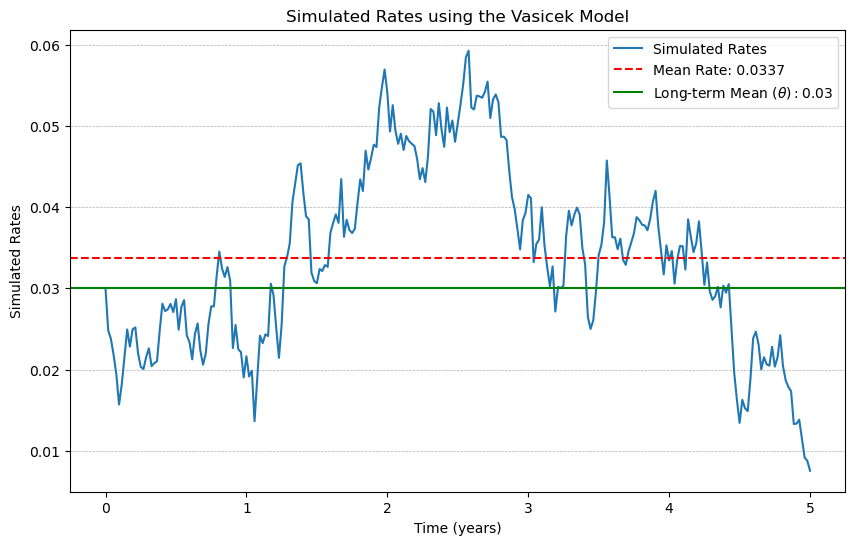

In [13]:
num_simulations = short_rates_q.shape[0]

mean_rates = np.mean(short_rates_q)
print(mean_rates)

plt.figure(figsize=(10, 6)) 

for i in range(num_simulations):
    plt.plot(time_points, short_rates_q[i, :], label= "Simulated Rates", color ='tab:blue')

plt.axhline(y=mean_rates, color='r', linestyle='--', label=f"Mean Rate: {mean_rates:.4f}")
plt.axhline(y=theta, color='g', linestyle='-', label=f"Long-term Mean $(\\theta ): {theta:.2f}$")
plt.xlabel('Time (years)')
plt.ylabel('Simulated Rates')
plt.title('Simulated Rates using the Vasicek Model')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlot.png")
plt.legend()
plt.show()
plt.close()

In [14]:
short_rate = 0.03
theta = 0.03
kappa = 1.0
beta = 0.02
dt = 1/52
time_points = np.arange(0, 5.01, dt)
short_rates_q_ = simulate_vasicek(short_rate, kappa=kappa, theta=theta, beta=beta, horizon=5, dt=dt, num_sim=10)

0.02833747660774269


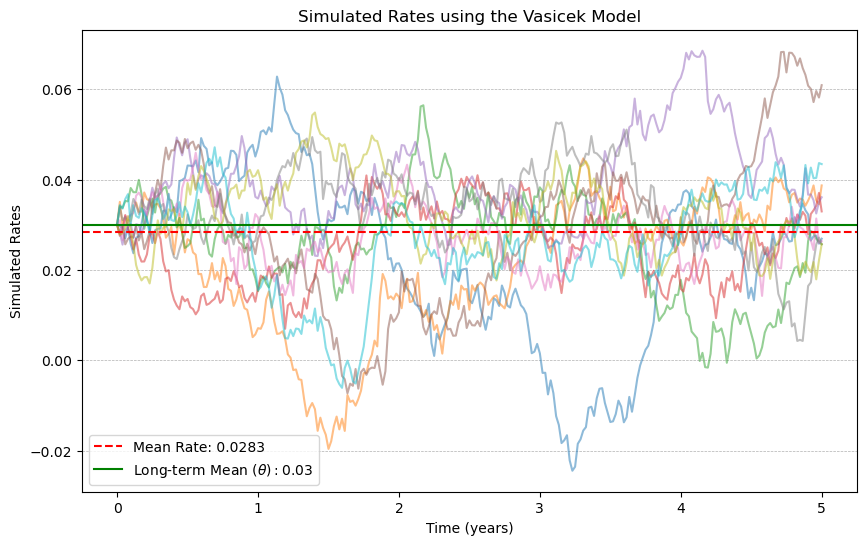

In [15]:
num_simulations = short_rates_q_.shape[0]

mean_rates = np.mean(short_rates_q_)
print(mean_rates)

plt.figure(figsize=(10, 6)) 

for i in range(num_simulations):
    plt.plot(time_points, short_rates_q_[i, :], alpha=0.5)

plt.axhline(y=mean_rates, color='r', linestyle='--', label=f"Mean Rate: {mean_rates:.4f}")
plt.axhline(y=theta, color='g', linestyle='-', label=f"Long-term Mean $(\\theta ): {theta:.2f}$")
plt.xlabel('Time (years)')
plt.ylabel('Simulated Rates')
plt.title('Simulated Rates using the Vasicek Model')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/VasicekModelPlotSIM.png")
plt.legend()
plt.show()
plt.close()

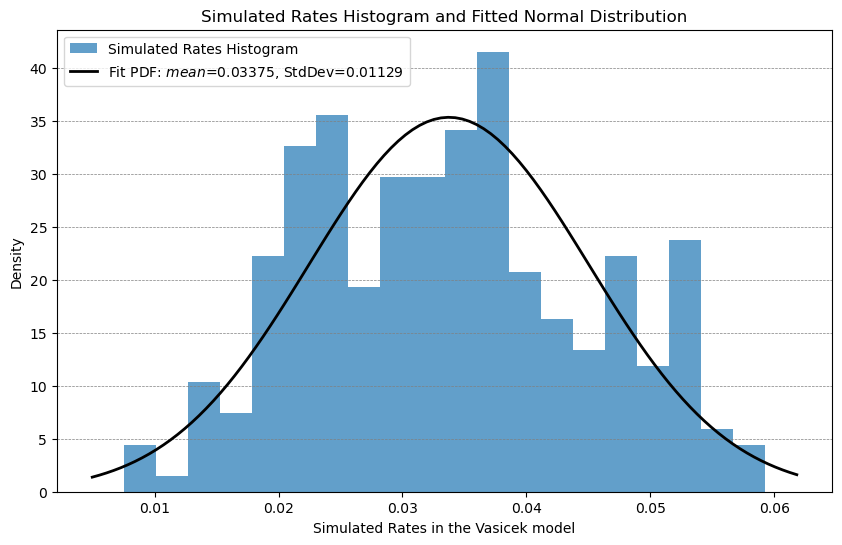

In [16]:
data = np.random.normal(loc=0, scale=1, size=1000)
mu, std = norm.fit(short_rates_q[0,:]) 

plt.figure(figsize=(10, 6))
plt.hist(short_rates_q[0,:], bins=20, density=True,color='tab:blue' ,alpha=0.7, label='Simulated Rates Histogram')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label=f'Fit PDF: $mean$={mu:.5f}, StdDev={std:.5f}')


plt.xlabel('Simulated Rates in the Vasicek model')
plt.ylabel('Density')
plt.title('Simulated Rates Histogram and Fitted Normal Distribution')
plt.legend()  
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5) 
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/NormalDistributionPlot.png")  
plt.show()
plt.close()